<a href="https://colab.research.google.com/github/alistechworld/Brain-Tumor-Segmentation-with-YOLOv11-SAM2/blob/main/Yolo11_and_SAM2_Brain_Tumor_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
import zipfile
import os

# Step 1: Upload the zip file from your local machine
uploaded = files.upload()

# Get the name of the uploaded zip file
zip_filename = next(iter(uploaded))
print(f"Uploaded file: {zip_filename}")

# Step 2: Extract the zip file
extract_path = '/content/extracted_data'  # You can change this path if needed

# Create directory if it doesn't exist
os.makedirs(extract_path, exist_ok=True)

# Extract the zip file
with zipfile.ZipFile(zip_filename, 'r') as zip_ref:
    zip_ref.extractall(extract_path)
    print(f"Extracted to: {extract_path}")

# Step 3: List the extracted files (optional)
print("\nExtracted files:")
extracted_files = os.listdir(extract_path)
for file in extracted_files:
    print(file)

Saving Tumor Detection.v8i.yolov11.zip to Tumor Detection.v8i.yolov11.zip
Uploaded file: Tumor Detection.v8i.yolov11.zip
Extracted to: /content/extracted_data

Extracted files:
data.yaml
test
train
valid
README.roboflow.txt
README.dataset.txt


In [2]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 32.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 124.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 88.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 63.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 78.2 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling

In [3]:
from ultralytics import YOLO

# Load a model
model = YOLO("yolo11n.pt")

# Train the model
train_results = model.train(
    data="/content/extracted_data/data.yaml",  # path to dataset YAML
    epochs=20,  # number of training epochs
    imgsz=640,  # training image size
    device=0,  # device to run on, i.e. device=0 or device=0,1,2,3 or device=cpu
)

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


100%|██████████| 5.35M/5.35M [00:00<00:00, 101MB/s]


Ultralytics 8.3.144 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/extracted_data/data.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=20, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo11n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=12.0, pretrain

100%|██████████| 755k/755k [00:00<00:00, 21.8MB/s]

Overriding model.yaml nc=80 with nc=5

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      6640  ultralytics.nn.modules.block.C3k2            [32, 64, 1, False, 0.25]      
  3                  -1  1     36992  ultralytics.nn.modules.conv.Conv             [64, 64, 3, 2]                
  4                  -1  1     26080  ultralytics.nn.modules.block.C3k2            [64, 128, 1, False, 0.25]     
  5                  -1  1    147712  ultralytics.nn.modules.conv.Conv             [128, 128, 3, 2]              
  6                  -1  1     87040  ultralytics.nn.modules.block.C3k2            [128, 128, 1, True]           
  7                  -1  1    295424  ultralytics

 19                  -1  1     86720  ultralytics.nn.modules.block.C3k2            [192, 128, 1, False]          
 20                  -1  1    147712  ultralytics.nn.modules.conv.Conv             [128, 128, 3, 2]              
 21            [-1, 10]  1         0  ultralytics.nn.modules.conv.Concat           [1]                           
 22                  -1  1    378880  ultralytics.nn.modules.block.C3k2            [384, 256, 1, True]           
 23        [16, 19, 22]  1    431647  ultralytics.nn.modules.head.Detect           [5, [64, 128, 256]]           
YOLO11n summary: 181 layers, 2,590,815 parameters, 2,590,799 gradients, 6.4 GFLOPs

Transferred 448/499 items from pretrained weights
Freezing layer 'model.23.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks...
AMP: checks passed ✅
train: Fast image access ✅ (ping: 0.0±0.0 ms, read: 136.3±158.5 MB/s, size: 34.0 KB)


train: Scanning /content/extracted_data/train/labels... 1370 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1370/1370 [00:01<00:00, 1146.25it/s]

train: /content/extracted_data/train/images/no_tumor_914_jpg.rf.6714544aee2bde5213fd2c366dff62aa.jpg: 1 duplicate labels removed
train: New cache created: /content/extracted_data/train/labels.cache
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 1456, len(boxes) = 1461. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 11.5±7.7 MB/s, size: 29.4 KB)


val: Scanning /content/extracted_data/valid/labels... 395 images, 0 backgrounds, 0 corrupt: 100%|██████████| 395/395 [00:00<00:00, 447.36it/s]

val: New cache created: /content/extracted_data/valid/labels.cache


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001111, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 20 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/20       2.4G     0.9377       3.05      1.287         13        640: 100%|██████████| 86/86 [00:27<00:00,  3.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  3.17it/s]

                   all        395        415      0.809      0.237      0.395      0.265



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/20       2.8G     0.9257      1.941      1.256         16        640: 100%|██████████| 86/86 [00:24<00:00,  3.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  4.11it/s]


                   all        395        415      0.683      0.431      0.434      0.297

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/20      2.81G     0.9627      1.705      1.295         24        640: 100%|██████████| 86/86 [00:23<00:00,  3.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  3.31it/s]

                   all        395        415      0.827       0.42      0.466      0.315



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/20      2.83G     0.9641      1.541      1.291         18        640: 100%|██████████| 86/86 [00:22<00:00,  3.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  3.25it/s]

                   all        395        415       0.82      0.478      0.515      0.368



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/20      2.85G     0.9276      1.345      1.256         11        640: 100%|██████████| 86/86 [00:23<00:00,  3.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  3.78it/s]

                   all        395        415      0.779      0.428      0.427      0.308



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/20      2.86G     0.8845      1.235       1.24         21        640: 100%|██████████| 86/86 [00:23<00:00,  3.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  4.40it/s]

                   all        395        415      0.852      0.505      0.576      0.408



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/20      2.88G     0.8655      1.106      1.231         15        640: 100%|██████████| 86/86 [00:23<00:00,  3.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  4.27it/s]

                   all        395        415      0.748      0.582      0.578      0.441



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/20      2.89G     0.8639      1.063      1.234         18        640: 100%|██████████| 86/86 [00:23<00:00,  3.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  4.42it/s]

                   all        395        415      0.715      0.545      0.585      0.438



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/20       2.9G     0.7992     0.9587      1.171         21        640: 100%|██████████| 86/86 [00:23<00:00,  3.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  4.35it/s]

                   all        395        415      0.794      0.525       0.58      0.428



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/20      2.92G     0.7977     0.9304      1.189         19        640: 100%|██████████| 86/86 [00:23<00:00,  3.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  4.24it/s]

                   all        395        415      0.767      0.532      0.596      0.456


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/20      2.93G     0.7135     0.9618      1.162         10        640: 100%|██████████| 86/86 [00:24<00:00,  3.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  4.41it/s]

                   all        395        415       0.82      0.564      0.604      0.467



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/20      2.95G     0.6882     0.8592      1.145         11        640: 100%|██████████| 86/86 [00:22<00:00,  3.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  4.37it/s]

                   all        395        415      0.838       0.55      0.609      0.468



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/20      2.96G     0.6732     0.8115      1.125         10        640: 100%|██████████| 86/86 [00:22<00:00,  3.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  4.34it/s]

                   all        395        415       0.78      0.602      0.603      0.478



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/20      2.98G     0.6299     0.7347      1.094         11        640: 100%|██████████| 86/86 [00:22<00:00,  3.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  4.34it/s]

                   all        395        415      0.833      0.612      0.632      0.503



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/20      2.99G     0.6148     0.7048      1.075         11        640: 100%|██████████| 86/86 [00:22<00:00,  3.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  4.30it/s]

                   all        395        415      0.852      0.591      0.616      0.489



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/20      3.01G     0.5964       0.67      1.064         10        640: 100%|██████████| 86/86 [00:22<00:00,  3.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  4.48it/s]

                   all        395        415      0.856      0.618      0.648      0.518



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/20      3.02G     0.5744      0.631      1.057         12        640: 100%|██████████| 86/86 [00:22<00:00,  3.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  4.41it/s]

                   all        395        415      0.872      0.613      0.656       0.53



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/20      3.04G     0.5505     0.6198      1.029         11        640: 100%|██████████| 86/86 [00:23<00:00,  3.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  4.34it/s]

                   all        395        415      0.859      0.606      0.647      0.522



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/20      3.05G     0.5412     0.5771      1.036         10        640: 100%|██████████| 86/86 [00:22<00:00,  3.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  4.34it/s]

                   all        395        415      0.911      0.603      0.662      0.542



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/20      3.07G     0.5265     0.5574      1.029         10        640: 100%|██████████| 86/86 [00:22<00:00,  3.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  4.43it/s]

                   all        395        415       0.86      0.645      0.668      0.549



20 epochs completed in 0.149 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 5.5MB
Optimizer stripped from runs/detect/train/weights/best.pt, 5.5MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.144 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n summary (fused): 100 layers, 2,583,127 parameters, 0 gradients, 6.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:06<00:00,  2.15it/s]


                   all        395        415       0.86      0.645      0.668      0.549
              NO_tumor        115        116      0.923      0.974       0.97      0.801
                glioma         30         36      0.707      0.603      0.641      0.466
            meningioma        144        148      0.931      0.899      0.943      0.828
             pituitary        106        111       0.74      0.748      0.787      0.646
space-occupying lesion-          1          4          1          0    0.00162    0.00113
Speed: 0.3ms preprocess, 2.7ms inference, 0.0ms loss, 4.4ms postprocess per image
Results saved to runs/detect/train


In [4]:
from google.colab import files
import zipfile
import os

# Step 1: Upload the zip file
uploaded = files.upload()
zip_filename = next(iter(uploaded))
print(f"Uploaded file: {zip_filename}")

# Step 2: Extract the zip file
extract_path = '/content/extracted_data'
os.makedirs(extract_path, exist_ok=True)

with zipfile.ZipFile(zip_filename, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

# Step 3: Find and verify test_images folder
test_images_path = os.path.join(extract_path, 'test_images')

if os.path.exists(test_images_path):
    print(f"\nFound test_images at: {test_images_path}")
    print("\nContents of test_images:")
    for file in os.listdir(test_images_path):
        print(file)
else:
    print("\n'test_images' folder not found in root of extracted data.")
    print("\nAvailable folders/files in extracted data:")
    for item in os.listdir(extract_path):
        print(item)
    print("\nYou may need to adjust the path if test_images is in a subdirectory")

Saving Tumor Detection.v8i.yolov11.zip to Tumor Detection.v8i.yolov11 (1).zip
Uploaded file: Tumor Detection.v8i.yolov11 (1).zip

'test_images' folder not found in root of extracted data.

Available folders/files in extracted data:
data.yaml
test
train
valid
README.roboflow.txt
README.dataset.txt

You may need to adjust the path if test_images is in a subdirectory



image 1/1 /content/extracted_data/test/images/meningioma_71_jpg.rf.4d768fe0e92a33f05b52022d71b3c6e2.jpg: 640x640 1 meningioma, 13.9ms
Speed: 2.4ms preprocess, 13.9ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict


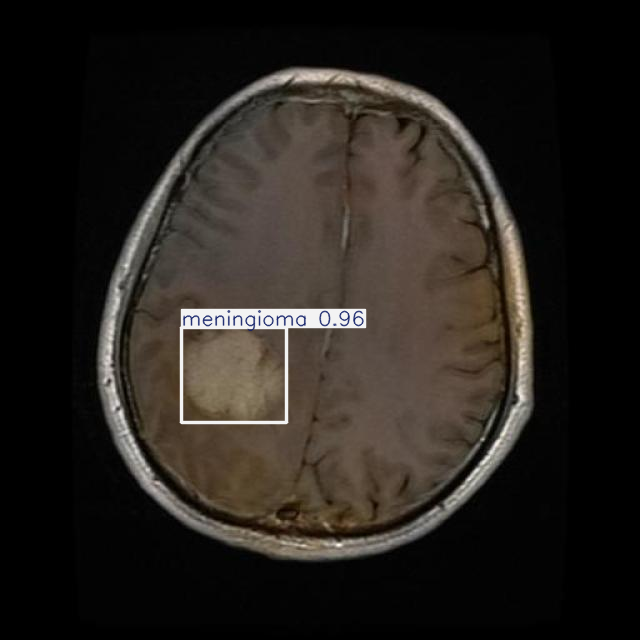

In [13]:
from ultralytics import YOLO

# Load a model
model = YOLO("runs/detect/train/weights/best.pt")

# Perform object detection on an image
results = model("/content/extracted_data/test/images/meningioma_71_jpg.rf.4d768fe0e92a33f05b52022d71b3c6e2.jpg", save=True)
results[0].show()


In [14]:
# Load a model
model = YOLO("runs/detect/train/weights/best.pt")

# Perform object detection on an image
results = model("/content/extracted_data/test/images", save=True)



image 1/191 /content/extracted_data/test/images/glioma_1025_jpg.rf.16f677de0fc84afa6b702f2fb8bdb3c2.jpg: 640x640 3 gliomas, 10.3ms
image 2/191 /content/extracted_data/test/images/glioma_1128_jpg.rf.e50d9e41b37fb138368e116b69077ff7.jpg: 640x640 1 pituitary, 8.4ms
image 3/191 /content/extracted_data/test/images/glioma_1166_jpg.rf.493c4f22cb16b11580eabec42f51c3de.jpg: 640x640 1 meningioma, 8.3ms
image 4/191 /content/extracted_data/test/images/glioma_1246_jpg.rf.af4ca1f2e92bf1e7df0360136f128877.jpg: 640x640 1 glioma, 9.6ms
image 5/191 /content/extracted_data/test/images/glioma_20_jpg.rf.8fdf825f9ca269bc07429aee7781e8d9.jpg: 640x640 1 glioma, 8.2ms
image 6/191 /content/extracted_data/test/images/glioma_271_jpg.rf.6bc0439160ce05a380aa64a2dbac9a3c.jpg: 640x640 2 gliomas, 8.6ms
image 7/191 /content/extracted_data/test/images/glioma_303_jpg.rf.6410c94058edf9c93866ef5805b93160.jpg: 640x640 3 gliomas, 8.4ms
image 8/191 /content/extracted_data/test/images/glioma_415_jpg.rf.5205038d338b9add63b4ac6

In [16]:
from ultralytics import YOLO

# Load a model
model = YOLO("runs/detect/train/weights/best.pt")  # pretrained YOLO11n model

# Run batched inference on a list of images
results = model("/content/extracted_data/test/images/meningioma_71_jpg.rf.4d768fe0e92a33f05b52022d71b3c6e2.jpg")  # return a list of Results objects

# Process results list
for result in results:
    boxes = result.boxes  # Boxes object for bounding box outputs
    print(boxes)


image 1/1 /content/extracted_data/test/images/meningioma_71_jpg.rf.4d768fe0e92a33f05b52022d71b3c6e2.jpg: 640x640 1 meningioma, 10.7ms
Speed: 2.2ms preprocess, 10.7ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)
ultralytics.engine.results.Boxes object with attributes:

cls: tensor([2.], device='cuda:0')
conf: tensor([0.9645], device='cuda:0')
data: tensor([[181.0675, 327.2883, 286.4992, 422.7318,   0.9645,   2.0000]], device='cuda:0')
id: None
is_track: False
orig_shape: (640, 640)
shape: torch.Size([1, 6])
xywh: tensor([[233.7834, 375.0100, 105.4317,  95.4435]], device='cuda:0')
xywhn: tensor([[0.3653, 0.5860, 0.1647, 0.1491]], device='cuda:0')
xyxy: tensor([[181.0675, 327.2883, 286.4992, 422.7318]], device='cuda:0')
xyxyn: tensor([[0.2829, 0.5114, 0.4477, 0.6605]], device='cuda:0')


In [17]:
from ultralytics import YOLO
from ultralytics import SAM

# Load the YOLO model
yolo_model = YOLO("runs/detect/train/weights/best.pt")  # pretrained YOLO model

# Run batched inference on a list of images
results = yolo_model("/content/extracted_data/test/images/meningioma_71_jpg.rf.4d768fe0e92a33f05b52022d71b3c6e2.jpg")  # return a list of Results objects

# Load the SAM model
sam_model = SAM("sam2_b.pt")

for result in results:
     class_ids = result.boxes.cls.int().tolist()  # noqa
     if len(class_ids):
         boxes = result.boxes.xyxy  # Boxes object for bbox outputs
         sam_results = sam_model(result.orig_img, bboxes=boxes, verbose=False, save=True, device=0)


image 1/1 /content/extracted_data/test/images/meningioma_71_jpg.rf.4d768fe0e92a33f05b52022d71b3c6e2.jpg: 640x640 1 meningioma, 8.7ms
Speed: 1.7ms preprocess, 8.7ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


100%|██████████| 154M/154M [00:02<00:00, 67.7MB/s]


Results saved to runs/segment/predict


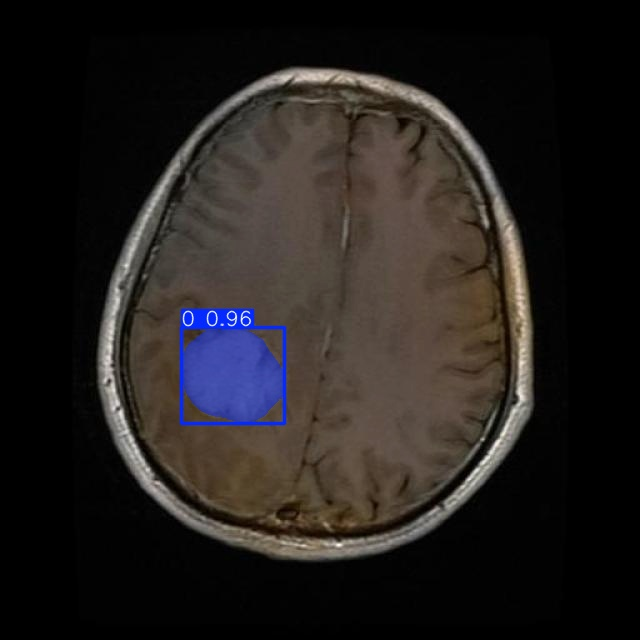

In [19]:
from IPython.display import Image, display

# Path where results are saved (based on your output)
results_dir = "runs/segment/predict"

# Get the latest prediction image
latest_prediction = sorted(os.listdir(results_dir))[-1]  # Gets most recent file
prediction_path = os.path.join(results_dir, latest_prediction)

# Display the image in Colab
display(Image(filename=prediction_path, width=600))